# py-earth-Example
In this notebook we will build a MARS model using the py-earth library. We will then plot the model coefficients along with observed and fitted values.

## Load libraries

In [11]:
import pyearth
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyearth import Earth
from sklearn.datasets import load_boston
%matplotlib inline

## Load Boston house prices dataset
This is a regression problem from scikit learn datasets.

In [2]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Build py-earth model
Here we are not allowing an interactions.

In [3]:
model = Earth(max_degree = 1, 
              minspan_alpha = .5, 
              allow_linear = True, 
              verbose = 1)

In [4]:
model.fit(boston.data, boston.target)

Beginning forward pass
-----------------------------------------------------------------
iter  parent  var  knot  mse        terms  gcv     rsq    grsq   
-----------------------------------------------------------------
0     -       -    -     84.419556  1      84.754  0.000  0.000  
1     0       12   324   27.689503  3      28.358  0.672  0.665  
2     0       5    433   19.071622  5      19.929  0.774  0.765  
3     0       7    379   16.676390  7      17.783  0.802  0.790  
4     0       0    478   14.482245  9      15.764  0.828  0.814  
5     0       10   -1    13.490094  10     14.836  0.840  0.825  
6     0       4    -1    12.798339  11     14.222  0.848  0.832  
7     0       0    368   12.314808  13     13.975  0.854  0.835  
8     0       11   176   12.021505  15     13.934  0.858  0.836  
9     0       5    226   11.760489  17     13.926  0.861  0.836  
10    0       9    -1    11.531852  18     13.803  0.863  0.837  
11    0       8    -1    11.208332  19     13.562  0.

/Users/richardangell/anaconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/richardangell/anaconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(allow_linear=True, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=1, max_terms=None,
   min_search_points=None, minspan=None, minspan_alpha=0.5, penalty=None,
   smooth=None, thresh=None, use_fast=None, verbose=1, zero_tol=None)

In [5]:
print(model.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      45.6927      
h(x12-6.12)     No      -0.514896    
h(6.12-x12)     No      2.26816      
h(x5-6.436)     No      8.66728      
h(6.436-x5)     Yes     None         
h(x7-1.3861)    No      -0.609608    
h(1.3861-x7)    No      59.5671      
h(x0-10.233)    Yes     None         
h(10.233-x0)    No      0.901577     
x10             No      -0.61703     
x4              No      -19.2833     
h(x0-4.89822)   No      -0.0928066   
h(4.89822-x0)   No      -1.14664     
h(x11-393.23)   No      -0.321367    
h(393.23-x11)   No      -0.00600713  
h(x5-8.04)      No      -10.8024     
h(8.04-x5)      Yes     None         
x9              No      -0.0131283   
x8              No      0.287167     
h(x7-4.233)     Yes     None         
h(4.233-x7)     No      1.25881      
h(x12-23.29)    No      0.316282     
h(23.29-x12)    Yes     None         


## Get predictions

In [6]:
y_hat = model.predict(boston.data)
boston_data_df = pd.DataFrame(boston.data)
boston_data_df.columns = boston.feature_names
boston_data_df["target"] = boston.target
boston_data_df["y_hat"] = y_hat
boston_data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,y_hat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,27.032513
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.761594
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,35.725833
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,35.670023
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,30.820033


## Get model structure in tabular form
First define a function to do this, it is essentially doing the same thing as model.summary() just returning the information in a pd.DataFrame. <br> 
Note, pyearth.export has various functions to export the model formula too.

In [12]:
def get_tabular_structure(earth_model):
    """
    Exports model structure in tabular form. Basically returns the same information as earth_model.summary().
    :param earth_model: Trained pyearth model
    :return: pd.DataFrame, with columns coefficient, has knot, is_pruned, knot, reverse and variable
    """
    info_list = []
    i = 0
    counter = 0
    # loop through each of the model basis functions
    for bf in earth_model.basis_:
        info_dict = {}
        # record the coefficient only for the intercept term
        if type(bf) is pyearth._basis.ConstantBasisFunction:
            info_dict['coefficient'] = earth_model.coef_[0, counter]
            counter += 1
        else:
            # record variable number, knot value and if basis fcn was pruned
            info_dict['variable'] = bf.get_variable()
            info_dict['has_knot'] = bf.has_knot()
            info_dict['is_pruned'] = bf.is_pruned()
            # if the basis fcn was not pruned the record the coefficient
            if not bf.is_pruned():
                info_dict['coefficient'] = earth_model.coef_[0, counter]
                counter += 1
            # if the basis fcn has a knot record knot value and direction
            if bf.has_knot():
                info_dict['knot'] = bf.get_knot()
                info_dict['reverse'] = bf.get_reverse()
        # append current basis fcn dict to list
        info_list = info_list + [info_dict]
        i += 1
    # convert to DataFrame and return
    info_pd = pd.DataFrame.from_dict(info_list)
    return(info_pd)

In [13]:
model_summary = get_tabular_structure(model)
model_summary

,coefficient,has_knot,is_pruned,knot,reverse,variable
0,45.692729,NaN,NaN,NaN,NaN,NaN
1,-0.514896,True,False,6.12000,False,12.0
2,2.268160,True,False,6.12000,True,12.0
3,8.667277,True,False,6.43600,False,5.0
4,NaN,True,True,6.43600,True,5.0
5,-0.609608,True,False,1.38610,False,7.0
6,59.567067,True,False,1.38610,True,7.0
7,NaN,True,True,10.23300,False,0.0
8,0.901577,True,False,10.23300,True,0.0
9,-0.617030,False,False,NaN,NaN,10.0


## Define a function to calculate combined model coefficients
i.e. sum all basis functions relating to a given variable

In [14]:
def combine_hinges(midpoints, hinges, variable):
    """
    Calculates model coefficients for a given variable. 
    This is done by summing all basis functions relating to given variable.
    :param midpoints: Trained pyearth model
    :param hinges: Trained pyearth model
    :param variable: Variable number
    :return: pd.DataFrame, with columns coefficient, has knot, is_pruned, knot, reverse and variable
    """
    
    # select rows from hinges (model_summary above) corresponding to the input variable coefficients
    var_hinges = hinges.loc[(~hinges['coefficient'].isnull()) & (hinges['variable'] == variable),:]
    
    # if there are coefficients for the input variable
    if (var_hinges.shape[0] > 0):
        
        hinge_preds = 0
        
        # loop through each basis function for the input variable
        for i in range(var_hinges.shape[0]):
            
            # if the basis fcn has a knot calculate the hinge fcn
            if var_hinges.iloc[i,:]['has_knot']:
                
                # if the hinge is for the reverse direction the formula is max(0, -x + knot)
                if var_hinges.iloc[i,:]['reverse']:
                    
                    hinge_contrib = var_hinges.iloc[i,:]['coefficient'] * \
                        (-midpoints + var_hinges.iloc[i,:]['knot']).clip(0, None)
                
                # if the hinge is NOT for the reverse direction the formula is max(0, x - knot)
                else:
                    
                    hinge_contrib = var_hinges.iloc[i,:]['coefficient'] * \
                        (midpoints - var_hinges.iloc[i,:]['knot']).clip(0, None)
                

            # otherwise, if the basis fcn does not have a knot simply multiply the input by the coefficient
            else:
                
                hinge_contrib = var_hinges.iloc[i,:]['coefficient'] * midpoints
            
            # add the basis functions together
            hinge_preds = hinge_preds + hinge_contrib
        
        return(hinge_preds)

## Plot all variables
Below we will plot the following all explanatory variable binned into (max of) 20 equal width buckets; 
- average observed (pink) <br> 
- average fitted or predicted values (dark green) <br>  
- number of observations by bin (yellow) <br> 
- model coefficient for the bin midpoint (light green) 

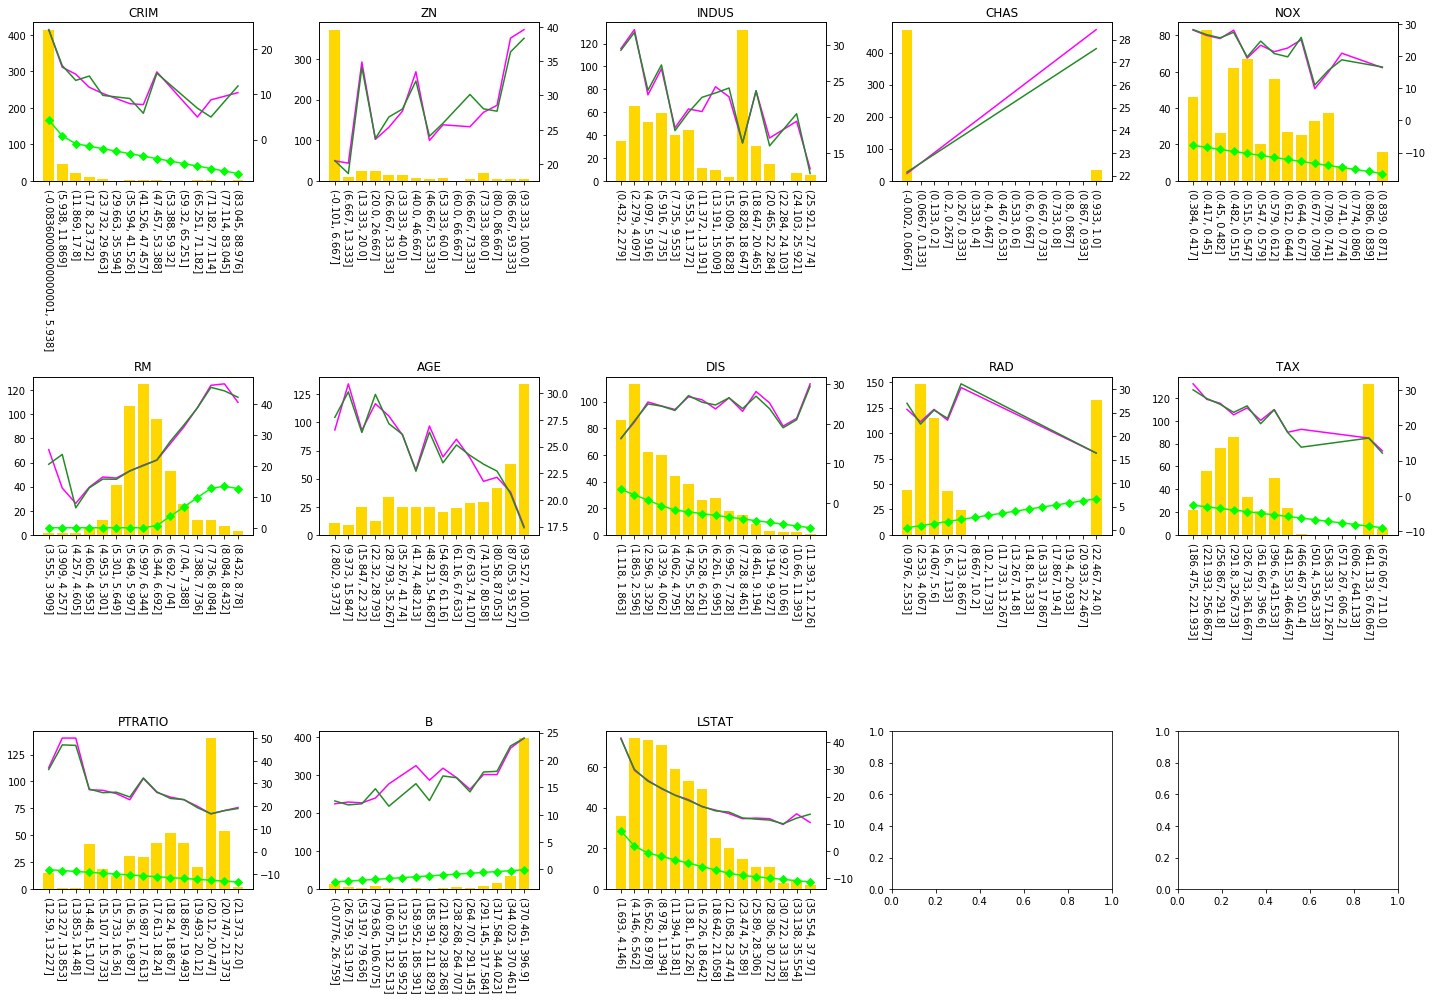

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 14))
for i in range(len(boston.feature_names)):
    
    row = i % 5
    col = int(i / 5)
    
    by_col = boston.feature_names[i]
    
    # bin the by_col variable into equal width buckets
    cut = pd.cut(boston_data_df[by_col], bins = 15, include_lowest = True)
    
    # calculate mean observed, fitted and count by bins
    f = {'target': ['mean'], 'y_hat': ['mean'], by_col: ['count']}
    bin_values = boston_data_df.groupby(cut).agg(f)
    
    # get bin mid points
    bin_values['mid'] = bin_values.index.values.map(lambda b: (b.right + b.left) / 2).categories

    # slightly roundabout way to get the index of the input variable
    which = lambda lst:list(np.where(lst)[0])
    var_idx = which(boston.feature_names == by_col)[0]
    
    # calculate coefficients for variable 
    bin_values['coef'] = combine_hinges(bin_values['mid'], 
                                        model_summary, 
                                        var_idx)

    # plot bin counts on first x axis 
    axes[col, row].bar(np.arange(bin_values.shape[0]), 
                       bin_values.iloc[:,2].reset_index(drop = True),
                       color = 'gold')
    
    # add title
    axes[col, row].set_title(by_col)
    
    # add labels to x axis
    plt.sca(axes[col, row])
    plt.xticks(np.arange(bin_values.shape[0]), bin_values.index, rotation = 270)
    
    # add second x axis
    ax2 = axes[col, row].twinx()
    
    # plot average observed on the 2nd axis in pink
    ax2.plot(bin_values.iloc[:,0].reset_index(drop = True).dropna().index,
             bin_values.iloc[:,0].reset_index(drop = True).dropna(),
             color = 'magenta', 
             linestyle = '-')
    
    # plot average observed on the 2nd axis in green
    ax2.plot(bin_values.iloc[:,1].reset_index(drop = True).dropna().index,
             bin_values.iloc[:,1].reset_index(drop = True).dropna(),
             color = 'forestgreen', 
             linestyle = '-')
    
    ax2.plot(bin_values.iloc[:,4].reset_index(drop = True).dropna().index,
             bin_values.iloc[:,4].reset_index(drop = True).dropna(),
             color = 'lime', 
             linestyle = '-',
             marker = 'D')
    
plt.tight_layout()    

## Plot a single variable
Have a look at the 5th variable (RM = ave no. of rooms per dwelling) which has a non-linear trend across the range of the variable.

In [16]:
def plot_bar_line(df, observed, fitted, by_col, bins):
    
    # bin the by_col variable into equal width buckets
    cut = pd.cut(df[by_col], bins)
    
    # calculate mean observed, fitted and count by bins
    f = {observed: ['mean'], fitted: ['mean'], by_col: ['count']}
    bin_values = df.groupby(cut).agg(f)
    
    # get bin mid points
    bin_values['mid'] = bin_values.index.values.map(lambda b: (b.right + b.left) / 2).categories
    
    # slightly roundabout way to get the index of the input variable
    which = lambda lst:list(np.where(lst)[0])
    var_idx = which(boston.feature_names == by_col)[0]
    
    # calculate coefficients for variable 
    bin_values['coef'] = combine_hinges(bin_values['mid'], 
                                        model_summary, 
                                        var_idx)
    
    fig, ax1 = plt.subplots(figsize=(20, 12))
    
    # plot bin counts on 1st axis 
    ax1.bar(np.arange(bin_values.shape[0]), 
            bin_values.iloc[:,2].reset_index(drop = True),
            color = 'gold')
    
    plt.xticks(np.arange(bin_values.shape[0]), bin_values.index, rotation = 270)
    
    ax2 = ax1.twinx()
    
    # plot average observed on the 2nd axis in pink
    ax2.plot(bin_values.iloc[:,0].reset_index(drop = True).dropna().index,
             bin_values.iloc[:,0].reset_index(drop = True).dropna(),
             color = 'magenta', 
             linestyle = '-',
             marker = 'D')
    
    # plot average observed on the 2nd axis in green
    ax2.plot(bin_values.iloc[:,1].reset_index(drop = True).dropna().index,
             bin_values.iloc[:,1].reset_index(drop = True).dropna(),
             color = 'forestgreen', 
             linestyle = '-',
             marker = 'D')
    
    ax2.plot(bin_values.iloc[:,4].reset_index(drop = True).dropna().index,
             bin_values.iloc[:,4].reset_index(drop = True).dropna(),
             color = 'lime', 
             linestyle = '-',
             marker = 'D')
    
    plt.title(by_col, fontsize=20)
    
    return(bin_values)

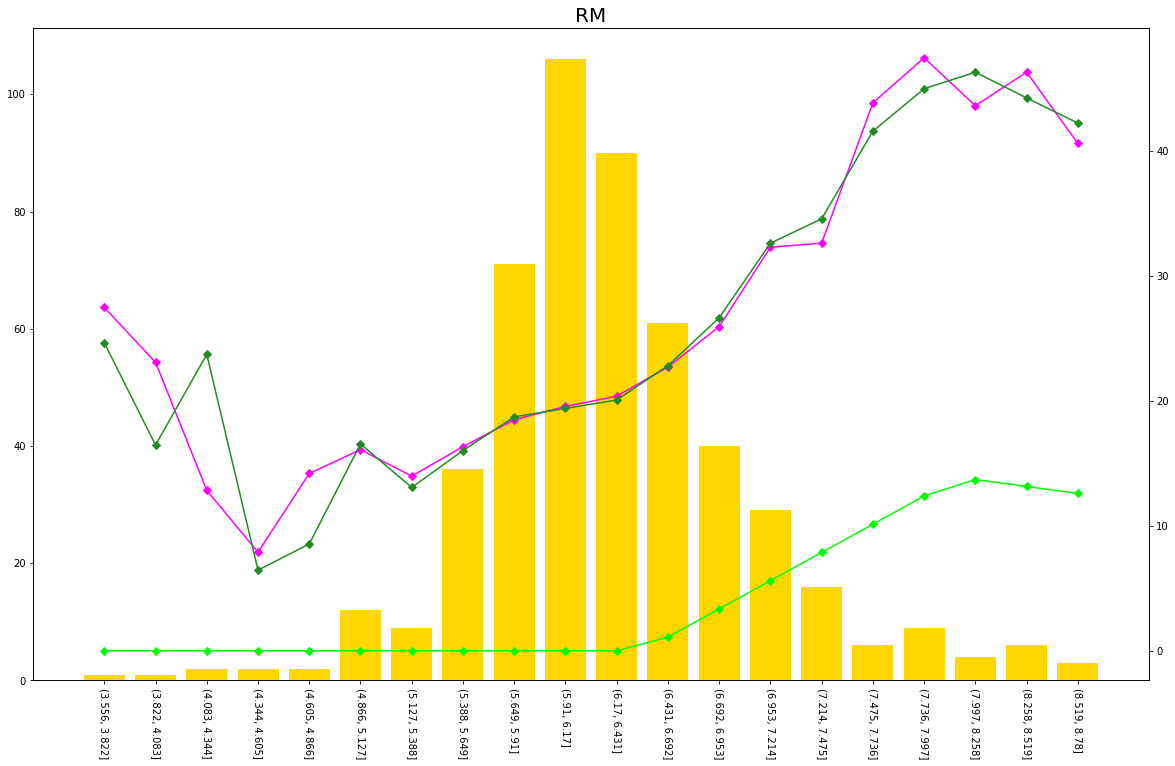

In [17]:
a = plot_bar_line(boston_data_df, 'target', 'y_hat', boston.feature_names[5], 20)